In [108]:
import pandas as pd
import numpy as np 
import os
import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# For investigating timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing

In [109]:
# Reading Data
base_path =  os.getcwd()
file_name = 'Traffic_Data.xlsx'
total_path = base_path + '//Data//' 
df = pd.read_excel(total_path + file_name, sheet_name='Sheet1')
df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
0,Connecticut,Northeast,14,2546,2432,November,11,2023,2023-11-01
1,Maine,Northeast,130,1177,1148,November,11,2023,2023-11-01
2,Massachusetts,Northeast,227,5148,5013,November,11,2023,2023-11-01
3,New Hampshire,Northeast,150,1062,1034,November,11,2023,2023-11-01
4,New Jersey,Northeast,73,6569,6339,November,11,2023,2023-11-01
5,New York,Northeast,110,9144,8825,November,11,2023,2023-11-01
6,Pennsylvania,Northeast,57,8610,8408,November,11,2023,2023-11-01
7,Rhode Island,Northeast,26,661,659,November,11,2023,2023-11-01
8,Vermont,Northeast,35,543,531,November,11,2023,2023-11-01
9,Delaware,South Atlantic,0,923,900,November,11,2023,2023-11-01


### Initial Decomposition

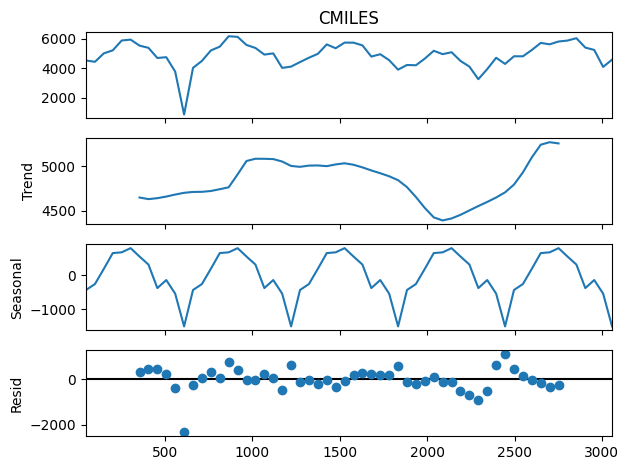

In [110]:
result = seasonal_decompose(df[df['State'] == 'Washington']['CMILES'], model='additive', period=12)
result.plot()
pyplot.show()

### Checking if Data is Stationary

In [111]:
dftest = adfuller(df['CMILES'])

# Printing results
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical Values:')
for key, value in dftest[4].items():
 print('\t%s: %.3f' % (key, value))

# p < 0.05 so data is stationary

ADF Statistic: -6.015802
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


### Checking ACF
Need to determine autocorrelation coefficient, i.e. how many time steps back is our current datapoint dependent on

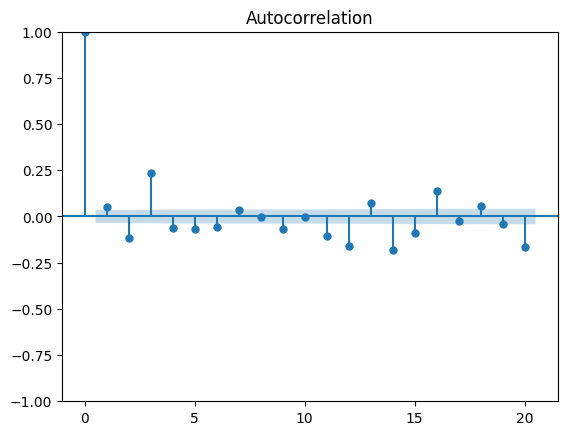

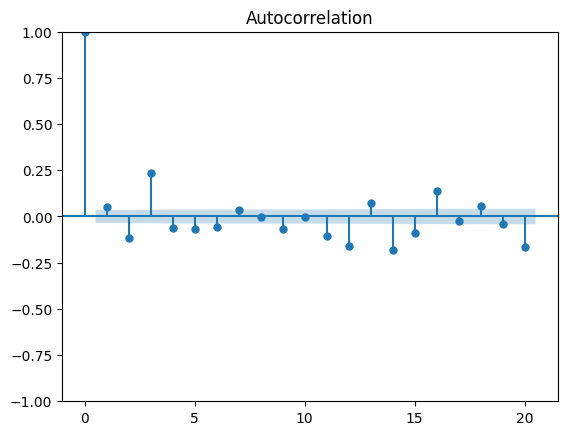

In [112]:
plot_acf(df['CMILES'], lags= 20)

## Training Model MA model

In [113]:
test_train_split = 0.9
train = df[:int(test_train_split * len(df['CMILES']))]
test = df[int(test_train_split * len(df['CMILES'])):]
test.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
2754,Connecticut,Northeast,16,2681,2749,June,6,2019,2019-06-01
2755,Maine,Northeast,103,1284,1309,June,6,2019,2019-06-01
2756,Massachusetts,Northeast,103,5461,5481,June,6,2019,2019-06-01
2757,New Hampshire,Northeast,163,1219,1237,June,6,2019,2019-06-01
2758,New Jersey,Northeast,50,6502,6476,June,6,2019,2019-06-01
2759,New York,Northeast,132,10587,10601,June,6,2019,2019-06-01
2760,Pennsylvania,Northeast,74,8812,8882,June,6,2019,2019-06-01
2761,Rhode Island,Northeast,0,717,723,June,6,2019,2019-06-01
2762,Vermont,Northeast,44,635,641,June,6,2019,2019-06-01
2763,Delaware,South Atlantic,28,1014,1017,June,6,2019,2019-06-01


In [114]:
def train_MA(df, test, train_length):

    # Initializing list to store predictions
    pred_MA = []

    predictions = []
    for month in range(len(test)):
        model = SARIMAX(df[:train_len + month], order= (0, 0, 2))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)

    return pred_MA

train_len = len(train)
test_len = len(test)
window = 2

# calling function and returning predictions
ma_predictions = train_MA(df['CMILES'], test['CMILES'], train_len)
print(ma_predictions)


[2754   -747.718064
dtype: float64, 2755    1736.134382
dtype: float64, 2756   -219.857954
dtype: float64, 2757    2879.96609
dtype: float64, 2758   -823.705523
dtype: float64, 2759    3701.550811
dtype: float64, 2760    3512.524026
dtype: float64, 2761    2712.616031
dtype: float64, 2762   -993.023951
dtype: float64, 2763    818.050808
dtype: float64, 2764    105.447875
dtype: float64, 2765    124.268658
dtype: float64, 2766    9388.252757
dtype: float64, 2767    493.244909
dtype: float64, 2768    2401.799774
dtype: float64, 2769    4087.025462
dtype: float64, 2770    424.911279
dtype: float64, 2771    3476.424106
dtype: float64, 2772   -970.072286
dtype: float64, 2773    5655.968746
dtype: float64, 2774    543.713731
dtype: float64, 2775    1264.709444
dtype: float64, 2776    799.566285
dtype: float64, 2777    3812.904734
dtype: float64, 2778    818.554805
dtype: float64, 2779    2845.502428
dtype: float64, 2780   -456.365226
dtype: float64, 2781    680.002705
dtype: float64, 2782   

In [115]:
ma_predicted_df = test.copy()
ma_predicted_df['MA_Pred'] = ma_predictions
ma_predicted_df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date,MA_Pred
2754,Connecticut,Northeast,16,2681,2749,June,6,2019,2019-06-01,2754 -747.718064 dtype: float64
2755,Maine,Northeast,103,1284,1309,June,6,2019,2019-06-01,2755 1736.134382 dtype: float64
2756,Massachusetts,Northeast,103,5461,5481,June,6,2019,2019-06-01,2756 -219.857954 dtype: float64
2757,New Hampshire,Northeast,163,1219,1237,June,6,2019,2019-06-01,2757 2879.96609 dtype: float64
2758,New Jersey,Northeast,50,6502,6476,June,6,2019,2019-06-01,2758 -823.705523 dtype: float64
2759,New York,Northeast,132,10587,10601,June,6,2019,2019-06-01,2759 3701.550811 dtype: float64
2760,Pennsylvania,Northeast,74,8812,8882,June,6,2019,2019-06-01,2760 3512.524026 dtype: float64
2761,Rhode Island,Northeast,0,717,723,June,6,2019,2019-06-01,2761 2712.616031 dtype: float64
2762,Vermont,Northeast,44,635,641,June,6,2019,2019-06-01,2762 -993.023951 dtype: float64
2763,Delaware,South Atlantic,28,1014,1017,June,6,2019,2019-06-01,2763 818.050808 dtype: float64


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Ite

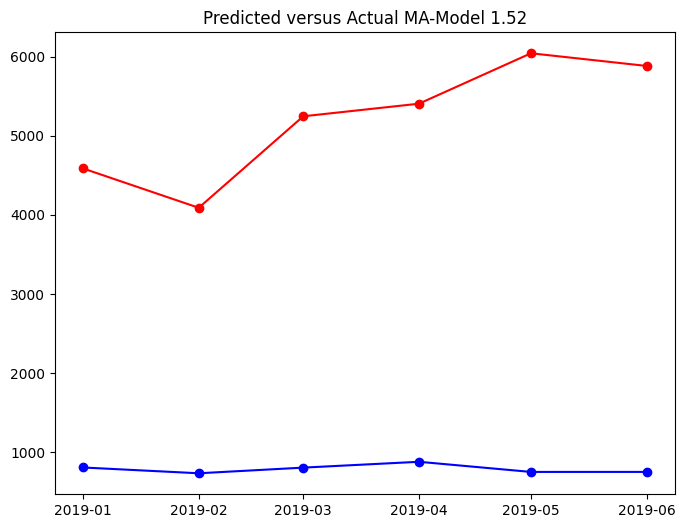

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
MA_mape = mean_absolute_percentage_error(ma_predicted_df['CMILES'], ma_predicted_df['MA_Pred'])
# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')
#print(MA_mape)
ax.set_title("Predicted versus Actual MA-Model " + str(round(MA_mape, 2)))
plt.show()

### Now adding Auto-Correlation factor

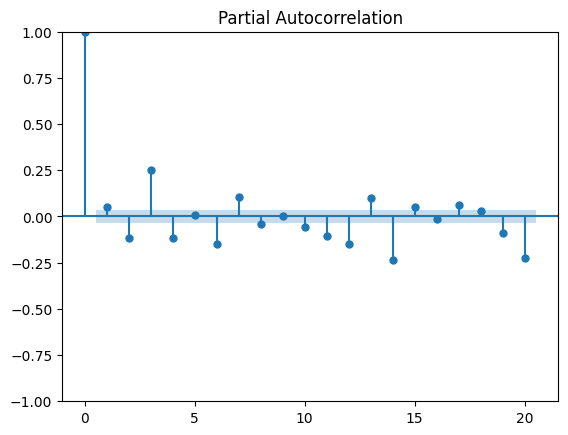

In [117]:
plot_pacf(df['CMILES'], lags=20)
pyplot.show()

In [118]:
# defining function for model training
def train_SARIMA(df, test, train_length):

    # Initializing list to store predictions
    pred_MA = []
    order = (1, 0, 2)
    seasonal_order = (1, 0, 1, 12)
    predictions = []

    for month in range(len(test)):
        model = SARIMAX(df[:train_len + month], 
                        order= order, 
                        seasonal_order=seasonal_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)

    return pred_MA

# calling function and returning predictions
sarima_predictions = train_MA(df['CMILES'], test['CMILES'], train_len)
ma_predicted_df['SARIMA_Pred'] = sarima_predictions
ma_predicted_df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date,MA_Pred,SARIMA_Pred
2754,Connecticut,Northeast,16,2681,2749,June,6,2019,2019-06-01,2754 -747.718064 dtype: float64,2754 -747.718064 dtype: float64
2755,Maine,Northeast,103,1284,1309,June,6,2019,2019-06-01,2755 1736.134382 dtype: float64,2755 1736.134382 dtype: float64
2756,Massachusetts,Northeast,103,5461,5481,June,6,2019,2019-06-01,2756 -219.857954 dtype: float64,2756 -219.857954 dtype: float64
2757,New Hampshire,Northeast,163,1219,1237,June,6,2019,2019-06-01,2757 2879.96609 dtype: float64,2757 2879.96609 dtype: float64
2758,New Jersey,Northeast,50,6502,6476,June,6,2019,2019-06-01,2758 -823.705523 dtype: float64,2758 -823.705523 dtype: float64
2759,New York,Northeast,132,10587,10601,June,6,2019,2019-06-01,2759 3701.550811 dtype: float64,2759 3701.550811 dtype: float64
2760,Pennsylvania,Northeast,74,8812,8882,June,6,2019,2019-06-01,2760 3512.524026 dtype: float64,2760 3512.524026 dtype: float64
2761,Rhode Island,Northeast,0,717,723,June,6,2019,2019-06-01,2761 2712.616031 dtype: float64,2761 2712.616031 dtype: float64
2762,Vermont,Northeast,44,635,641,June,6,2019,2019-06-01,2762 -993.023951 dtype: float64,2762 -993.023951 dtype: float64
2763,Delaware,South Atlantic,28,1014,1017,June,6,2019,2019-06-01,2763 818.050808 dtype: float64,2763 818.050808 dtype: float64


c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Items\Projects\Timeseries-Forecasting\.venv\Lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\seelc\OneDrive\Desktop\Lucas Desktop Ite

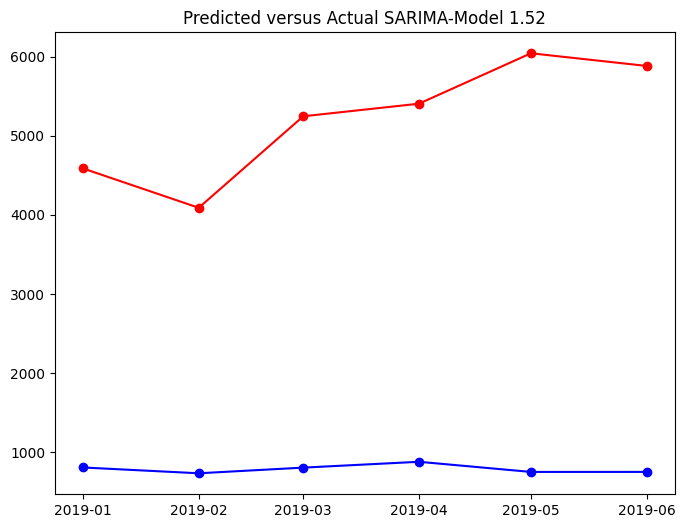

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
sarima_mape = mean_absolute_percentage_error(ma_predicted_df['CMILES'], ma_predicted_df['SARIMA_Pred'])
# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['SARIMA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['SARIMA_Pred'], color='BLUE')
#print(MA_mape)
ax.set_title("Predicted versus Actual SARIMA-Model " + str(round(sarima_mape, 2)))
plt.show()